# Welcome to class


The goal is to predict an animal's body weight given it's brain weight. The model we'll be using is called Linear Regression. The dataset we're using to train our model is a list of brain weight and body weight measurements from a bunch of animals. We'll fit our line to the data using the scikit learn machine learning library, then plot our graph using matplotlib.

In [2]:
#
# ONLY TO GOOGLE COLABORATORY
#

## Uploading files from your local file system

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving brain_body.txt to brain_body.txt
User uploaded file "brain_body.txt" with length 1258 bytes


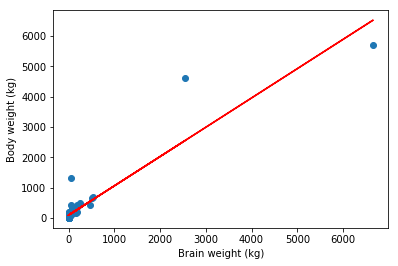

In [1]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

#read data
df = pd.read_fwf('Dataset/brain_body.txt')
X = df[['Brain']]
y = df[['Body']]


#train model on data
model = linear_model.LinearRegression()
model.fit(X, y)

#visualize results
plt.scatter(X.values,y.values)
plt.plot(X.values,model.predict(X),color='red')
plt.xlabel('Brain weight (kg)')
plt.ylabel('Body weight (kg)')

plt.show()

In [2]:
# Cell Configuration for plotly over google colab
# This method pre-populates the outputframe with the configuration that Plotly
# expects and must be executed for every cell which is displaying a Plotly graph.
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

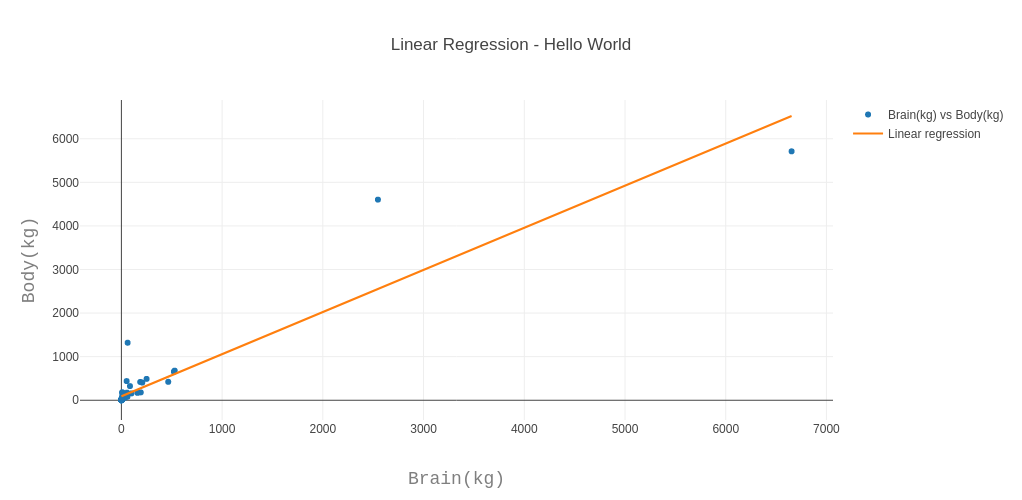

In [2]:
# plotly online requires login and password
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot,plot

# basic functions to run on google colab
# 
# UNCOMMENT THE TWO BELOW LINES IN CASE USE GOOGLE COLABORATORY
#
# configure_plotly_browser_state()
# init_notebook_mode(connected=False)

# create a generic layout
layout = go.Layout(width=800,
                   height=500,
                   title='Linear Regression - Hello World',
                   xaxis=dict(title='Brain(kg)',
                              titlefont=dict(
                                  family='Courier New, monospace',
                                  size=18,
                                  color='#7f7f7f')
                             ),
                   yaxis=dict(title='Body(kg)',
                              titlefont=dict(
                                  family='Courier New, monospace',
                                  size=18,
                                  color='#7f7f7f')
                             )
                  )


# generate a scatter from brain and body values
trace_0 = go.Scatter(x = X.values.reshape(-1),
                     y = y.values.reshape(-1),
                     mode = 'markers',
                     name = 'Brain(kg) vs Body(kg)')

# generate the regression line
trace_1 = go.Scatter(x = X.values.reshape(-1),
                     y = model.predict(X).reshape(-1),
                     mode = 'lines',
                     name = 'Linear regression'
                    )

# create a figure and plot in notebook. 
# if you wish save the hmtl, change iplot to plot
fig = go.Figure(data=[trace_0,trace_1],layout=layout)
pyo.iplot(fig)

# uncomment this line if you want to save fig to html
# pyo.plot(fig,filename='bighead.html')